<a href="https://colab.research.google.com/github/teukumhfs/TheIdealAirbnbSingapore/blob/main/Finding_the_Ideal_Airbnb_in_Singapore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding the Ideal Airbnb in Singapore

My friend and i planning a holiday in Singapore and demands careful selection of accommodations that meet our budget while garnering positive guest reviews. In this analysis, i'll discover the perfect Airbnb stay by striking a balance between stellar reviews and budget constraints.

My analysis will presents a curated list of Airbnb options in Singapore, ensuring an enjoyable and comfortable staying within suitable budget, while meeting the expectations for a delightful vacation. So, let's get started.

In [ ]:
# @title Import requirements
import numpy as np
import pandas as pd
import requests
import re
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

In [ ]:
# @title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Setup DataFrame path
df_listing = pd.read_csv('/content/drive/MyDrive/dataset/airbnb/listings_airbnb_sg.csv')

In [ ]:
# @title Show the data
df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,71609,Villa in Singapore · ★4.44 · 2 bedrooms · 3 be...,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,139,92,20,2020-01-17,0.14,5,363,0,NaN
1,71896,Home in Singapore · ★4.16 · 1 bedroom · 1 bed ...,367042,Belinda,East Region,Tampines,1.34754,103.95958,Private room,70,92,24,2019-10-13,0.17,5,365,0,NaN
2,71903,Home in Singapore · ★4.41 · 1 bedroom · 2 beds...,367042,Belinda,East Region,Tampines,1.34531,103.96100,Private room,81,92,47,2020-01-09,0.32,5,363,0,NaN
3,275343,Rental unit in Singapore · ★4.40 · 1 bedroom ·...,1439258,Kay,Central Region,Bukit Merah,1.29015,103.80814,Private room,55,90,22,2022-08-13,0.18,51,301,1,NaN
4,275344,Rental unit in Singapore · ★4.54 · 1 bedroom ·...,1439258,Kay,Central Region,Bukit Merah,1.28836,103.81144,Private room,69,60,15,2023-03-23,0.11,51,57,2,NaN


In [ ]:
# Show the data information
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3443 entries, 0 to 3442
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3443 non-null   int64  
 1   name                            3443 non-null   object 
 2   host_id                         3443 non-null   int64  
 3   host_name                       3443 non-null   object 
 4   neighbourhood_group             3443 non-null   object 
 5   neighbourhood                   3443 non-null   object 
 6   latitude                        3443 non-null   float64
 7   longitude                       3443 non-null   float64
 8   room_type                       3443 non-null   object 
 9   price                           3443 non-null   int64  
 10  minimum_nights                  3443 non-null   int64  
 11  number_of_reviews               3443 non-null   int64  
 12  last_review                     19

# Data Cleaning

In [ ]:
# @title Transforming the data

# Create rating column

# Create a copy of the DataFrame
modified_df_listing = df_listing.copy()

def extract_star_rating(name):
    # Use regular expression/re to find the star rating pattern (★X.XX)
    rating_match = re.search(r'★(\d+\.\d+)', name)
    if rating_match:
        return float(rating_match.group(1))
    else:
        return None

# Apply the function to create the new 'rating' column in the new DataFrame
modified_df_listing['rating'] = modified_df_listing['name'].apply(extract_star_rating)

# Merge the 'rating' column from new_df_listing to df_listing based on 'id'
new_df_listing = df_listing.merge(modified_df_listing[['id', 'rating']], on='id', how='left').copy()

In [ ]:
# @title Show transformed DataFrame with rating column
new_df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating
0,71609,Villa in Singapore · ★4.44 · 2 bedrooms · 3 be...,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,139,92,20,2020-01-17,0.14,5,363,0,NaN,4.44
1,71896,Home in Singapore · ★4.16 · 1 bedroom · 1 bed ...,367042,Belinda,East Region,Tampines,1.34754,103.95958,Private room,70,92,24,2019-10-13,0.17,5,365,0,NaN,4.16
2,71903,Home in Singapore · ★4.41 · 1 bedroom · 2 beds...,367042,Belinda,East Region,Tampines,1.34531,103.96100,Private room,81,92,47,2020-01-09,0.32,5,363,0,NaN,4.41
3,275343,Rental unit in Singapore · ★4.40 · 1 bedroom ·...,1439258,Kay,Central Region,Bukit Merah,1.29015,103.80814,Private room,55,90,22,2022-08-13,0.18,51,301,1,NaN,4.40
4,275344,Rental unit in Singapore · ★4.54 · 1 bedroom ·...,1439258,Kay,Central Region,Bukit Merah,1.28836,103.81144,Private room,69,60,15,2023-03-23,0.11,51,57,2,NaN,4.54


In [ ]:
# @title Select column to keep

# List of columns to keep
columns_to_keep = ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'room_type',
                   'price', 'last_review', 'reviews_per_month', 'availability_365', 'rating']

# Show only the specified columns
df_selected = new_df_listing[columns_to_keep]

df_selected.head()

,id,name,host_id,host_name,neighbourhood,room_type,price,last_review,reviews_per_month,availability_365,rating
0,71609,Villa in Singapore · ★4.44 · 2 bedrooms · 3 be...,367042,Belinda,Tampines,Private room,139,2020-01-17,0.14,363,4.44
1,71896,Home in Singapore · ★4.16 · 1 bedroom · 1 bed ...,367042,Belinda,Tampines,Private room,70,2019-10-13,0.17,365,4.16
2,71903,Home in Singapore · ★4.41 · 1 bedroom · 2 beds...,367042,Belinda,Tampines,Private room,81,2020-01-09,0.32,363,4.41
3,275343,Rental unit in Singapore · ★4.40 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,55,2022-08-13,0.18,301,4.40
4,275344,Rental unit in Singapore · ★4.54 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,69,2023-03-23,0.11,57,4.54


In [ ]:
# Count the DataFrame rows
count_rows = df_selected.shape[0]

print("Number of rows:", count_rows)

Number of rows: 3443


In [ ]:
# @title Check for missing values in the DataFrame
print(df_selected.isnull().sum())

id                      0
name                    0
host_id                 0
host_name               0
neighbourhood           0
room_type               0
price                   0
last_review          1534
reviews_per_month    1534
availability_365        0
rating               2272
dtype: int64


In [ ]:
# @title Handle missing values
import warnings

# Ignore SettingWithCopyWarnings
warnings.filterwarnings("ignore")

# missing value handling
df_selected['last_review'].fillna(0, inplace=True)
df_selected['reviews_per_month'].fillna(0, inplace=True)
df_selected['rating'].fillna('Unrated', inplace=True)

# Re-enable warnings
warnings.filterwarnings("default")

df_selected.head()

,id,name,host_id,host_name,neighbourhood,room_type,price,last_review,reviews_per_month,availability_365,rating
0,71609,Villa in Singapore · ★4.44 · 2 bedrooms · 3 be...,367042,Belinda,Tampines,Private room,139,2020-01-17,0.14,363,4.44
1,71896,Home in Singapore · ★4.16 · 1 bedroom · 1 bed ...,367042,Belinda,Tampines,Private room,70,2019-10-13,0.17,365,4.16
2,71903,Home in Singapore · ★4.41 · 1 bedroom · 2 beds...,367042,Belinda,Tampines,Private room,81,2020-01-09,0.32,363,4.41
3,275343,Rental unit in Singapore · ★4.40 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,55,2022-08-13,0.18,301,4.4
4,275344,Rental unit in Singapore · ★4.54 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,69,2023-03-23,0.11,57,4.54


In [ ]:
# @title Recheck for missing values
print(df_selected.isnull().sum())

id                   0
name                 0
host_id              0
host_name            0
neighbourhood        0
room_type            0
price                0
last_review          0
reviews_per_month    0
availability_365     0
rating               0
dtype: int64


In [ ]:
# @title Check for duplicates
print(df_selected.duplicated().sum())

0


Now, all the missing values are fixed and no duplicate values

In [ ]:
# @title Filter the DataFrame to include only the selected neighborhoods
selected_neighborhoods = ['Downtown Core', 'Geylang', 'Kallang', 'Bukit Merah',
                          'Queenstown', 'Bukit Timah', 'River Valley', 'Toa Payoh',
                          'Marina South', 'Clementi', 'Novena', 'Tanglin', 'Newton',
                          'Marine Parade']
df_filtered = df_selected.loc[df_selected['neighbourhood'].isin(selected_neighborhoods)]

df_filtered.head()

,id,name,host_id,host_name,neighbourhood,room_type,price,last_review,reviews_per_month,availability_365,rating
3,275343,Rental unit in Singapore · ★4.40 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,55,2022-08-13,0.18,301,4.4
4,275344,Rental unit in Singapore · ★4.54 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,69,2023-03-23,0.11,57,4.54
6,294281,Rental unit in Singapore · ★4.43 · 2 bedrooms ...,1521514,Elizabeth,Newton,Private room,85,2020-01-21,0.96,365,4.43
7,324945,Rental unit in Singapore · ★3.62 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,55,2022-07-25,0.13,235,3.62
8,330095,Rental unit in Singapore · ★4.50 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,49,2023-06-21,0.04,299,4.5


In [ ]:
# Count df_filtered rows

warnings.filterwarnings("ignore", category=DeprecationWarning)

filtered_rows = df_filtered.shape[0]
print("Number of rows:", filtered_rows)

warnings.filterwarnings("default")

Number of rows: 2084


In [ ]:
# @title Create new variable (neighbourhood_names)

# Select unique values from df_filtered
neighbourhood_names = df_filtered['neighbourhood'].unique()

print(neighbourhood_names)

['Bukit Merah' 'Newton' 'River Valley' 'Kallang' 'Bukit Timah'
 'Downtown Core' 'Marine Parade' 'Novena' 'Queenstown' 'Tanglin' 'Geylang'
 'Toa Payoh' 'Clementi' 'Marina South']


In [ ]:
# @title Count the neighbourhood unique values from df_filtered
neighborhood_counts = df_filtered['neighbourhood'].value_counts()

print(neighborhood_counts)

Kallang          360
Downtown Core    341
River Valley     232
Queenstown       202
Novena           193
Bukit Merah      191
Geylang          156
Marine Parade     85
Clementi          84
Newton            69
Tanglin           69
Toa Payoh         47
Bukit Timah       46
Marina South       9
Name: neighbourhood, dtype: int64


Despite Kallang having numerous options, its proximity to major tourist attractions remains uncertain. To ensure an exceptional staying experience in Singapore, we will now assess the star ratings to identify the most suitable location.

In [ ]:
# @title Count the rating by neighbourhood
rating_counts = df_filtered.groupby('neighbourhood')['rating'].value_counts()

print(rating_counts)

neighbourhood  rating
Bukit Merah    0.00      132
               5.00       10
               4.80        5
               4.67        3
               4.72        3
                        ... 
Toa Payoh      4.00        1
               4.25        1
               4.63        1
               4.83        1
               5.00        1
Name: rating, Length: 358, dtype: int64


To enhance comprehension, let's check the visualization.

# Visualization

<Figure size 600x400 with 0 Axes>

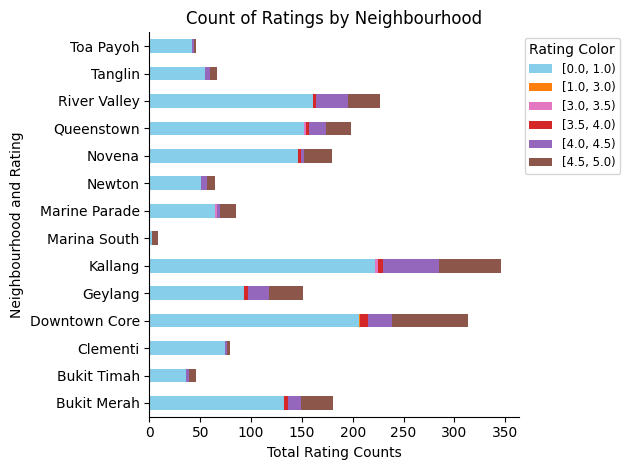

In [ ]:
# @title Visualization with barplot

warnings.filterwarnings("ignore")

# Replace 'df_filtered' with your actual DataFrame name
df_filtered['rating'] = df_filtered['rating'].astype(str).replace('nan', 'Unrated')

# Replace 'Unrated' with a numerical value (e.g., 0.00)
df_filtered['rating'] = df_filtered['rating'].replace('Unrated', '0.00').astype(float)

# Define the desired bin edges and labels for ratings
bin_edges = [0.00, 1.00, 3.00, 3.50, 4.00, 4.50, 5.0]

# Group by neighborhood and calculate rating counts
neighborhoods = df_filtered['neighbourhood']
rating_counts_by_neighborhood = df_filtered[df_filtered['neighbourhood'].isin(neighborhoods)].groupby('neighbourhood')['rating'].apply(lambda x: pd.cut(x, bins=bin_edges, right=False).value_counts().sort_index()).unstack(fill_value=0)

custom_colors = ['skyblue', '#ff7f0e', '#e377c2', '#d62728',
                 '#9467bd', '#8c564b', '#2ca02c']

# Create a horizontal bar plot
plt.figure(figsize=(6, 4))
ax = rating_counts_by_neighborhood.plot(kind='barh', stacked=True, color=custom_colors)

# Set the labels and title
plt.xlabel('Total Rating Counts')
plt.ylabel('Neighbourhood and Rating')
plt.title('Count of Ratings by Neighbourhood')

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), title='Rating Color', fontsize='small')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

warnings.filterwarnings("default")

According to the barplot, Downtown Core surpasses Kallang in terms of the number of places with ratings between 4.5 and 5.0. To determine the most strategically positioned neighborhood for tourism, we will be evaluating the map, we can identify which area offers better accessibility to a wide range of tourist attractions, aiding us in making an optimal choice for our stay in Singapore.

In [ ]:
# @title Add attractions in Singapore
attractions_singapore = ["Gardens by the Bay", "Marina Bay Sands",
                         "Sentosa Island", "Universal Studios Singapore",
                         "Orchard Road", "Singapore Flyer", "Singapore Zoo",
                         "Night Safari", "Jurong Bird Park", "S.E.A. Aquarium",
                         "River Wonders", "Wings of Time",
                         "Singapore River", "Singapore DUCKtours", "Merlion Park",
                         "National Museum of Singapore", "Adventure Cove Waterpark",
                         "Chinatown", "Singapore Cable Car", "ArtScience Museum"]

In [ ]:
# @title Setup the map visualization

# Select columns to keep for new variable to get coordinates
columns_get_coordinate = ['neighbourhood', 'latitude',
                   'longitude']

# Make variable to show only the specified columns on new_df_listing
df_coordinate = new_df_listing[columns_get_coordinate]

# Filter coordinate by selected neighbourhoods
# Selected_neighborhoods contains 14 neighbourhoods
df_filtered_coordinate = df_coordinate.loc[df_coordinate['neighbourhood'].isin(selected_neighborhoods)]

# Select the columns to make a new Dataframe
new_coordinates = ['latitude',
                   'longitude']

airbnb_coordinate = df_filtered_coordinate[new_coordinates]

# Format the coordinate DataFrame
coordinate_data = pd.DataFrame(airbnb_coordinate)

coordinate_data['formatted_coordinate_data'] = coordinate_data.apply(lambda row: f"{{{row['latitude']}, {row['longitude']}}}", axis=1)

# Create new variable for coordinate (latitude, longitude)
airbnb_data_coordinate = coordinate_data['formatted_coordinate_data']

In [ ]:
# @title Map visualization using folium

# Create the map centered at Singapore
map_singapore4 = folium.Map(location=[1.3521, 103.8198], zoom_start=12)

# Airbnb locations with their coordinates (latitude, longitude)
given_coordinates = airbnb_data_coordinate

# Extract latitude and longitude from the given_coordinates
coordinates_list = [list(map(float, coord.strip('{}').split(','))) for coord in given_coordinates]

# Create a heatmap layer
heatmap_layer = HeatMap(coordinates_list, radius=15, blur=20)

# Add the heatmap layer to the map
map_singapore4.add_child(heatmap_layer)

# Airbnb locations
airbnb_locations = neighbourhood_names

# Create a MarkerCluster group
marker_cluster = MarkerCluster()

# Add markers for each location to the MarkerCluster
for location in airbnb_locations:
    geolocator = Nominatim(user_agent="SingaporeMapGeo")
    location_info = geolocator.geocode(location + ', Singapore')
    if location_info:
        lat, lon = location_info.latitude, location_info.longitude
        popup_content = folium.Popup(location, parse_html=True)
        folium.Marker([lat, lon], popup=popup_content).add_to(marker_cluster)

# Add the MarkerCluster group to the map
marker_cluster.add_to(map_singapore4)

# Add attraction markers (you can keep the existing code for attractions)
attraction_names = attractions_singapore

for attraction in attraction_names:
    geolocator = Nominatim(user_agent="SingaporeMapGeo")
    attraction_info = geolocator.geocode(attraction + ', Singapore')
    if attraction_info:
        lat, lon = attraction_info.latitude, attraction_info.longitude
        folium.Marker([lat, lon], popup=attraction, icon=folium.Icon(color='red')).add_to(map_singapore4)

map_singapore4

The visualization highlights the favorable locations of Downtown Core, River Valley, Marina South, and Bukit Merah, with each area offering proximity to key attractions. Our focus will be on exploring accommodations within these three areas to ensure a convenient and enjoyable stay in Singapore.

If the map is not showing and get the result like this:
```
Make this Notebook Trusted to load map: File -> Trust Notebook
```
Open this notebook in Colab, you can just click this link [Map visualization using Folium](https://colab.research.google.com/github/teukumhfs/TheIdealAirbnbSingapore/blob/main/Finding_the_Ideal_Airbnb_in_Singapore.ipynb#scrollTo=zrd4h96vUpHb&line=1&uniqifier=1).


In [ ]:
# @title Count the rating by neighbourhood for the selected neighborhoods

# Create focus neighborhood
focus_neighborhoods = ['Downtown Core', 'Marina South', 'Bukit Merah', 'River Valley']

# Count the rating of selected neighborhood
rating_counts_selected = df_filtered.loc[df_filtered['neighbourhood'].isin(focus_neighborhoods)].groupby('neighbourhood')['rating'].value_counts()

print("Rating counts for the selected neighborhoods:\n")
print(rating_counts_selected)

Rating counts for the selected neighborhoods:

neighbourhood  rating
Bukit Merah    0.00      132
               5.00       10
               4.80        5
               4.67        3
               4.72        3
                        ... 
River Valley   4.76        1
               4.79        1
               4.84        1
               4.91        1
               4.95        1
Name: rating, Length: 137, dtype: int64


Now, let's see the rating value 4.00 to 5.00

In [ ]:
# @title Filter the rating counts, only include values between 4.00 and 5.00
rating_counts_filtered = rating_counts_selected.loc[(rating_counts_selected.index.get_level_values('rating') >= 4.00) & (rating_counts_selected.index.get_level_values('rating') <= 5.00)]

# Display the filtered rating counts for the selected neighborhoods without truncation
print("Rating counts between 4.00 and 5.00 for the selected neighborhoods:\n")
print(rating_counts_filtered)

Rating counts between 4.00 and 5.00 for the selected neighborhoods:

neighbourhood  rating
Bukit Merah    5.00      10
               4.80       5
               4.67       3
               4.72       3
               4.00       2
                         ..
River Valley   4.76       1
               4.79       1
               4.84       1
               4.91       1
               4.95       1
Name: rating, Length: 123, dtype: int64


In [ ]:
# @title Convert to dictionary format
rating_counts_dict = rating_counts_filtered.to_dict()

# Print the dictionary in the desired format
for key, value in rating_counts_dict.items():
    (f"{key}: {value}")

print(rating_counts_dict)

{('Bukit Merah', 5.0): 10, ('Bukit Merah', 4.8): 5, ('Bukit Merah', 4.67): 3, ('Bukit Merah', 4.72): 3, ('Bukit Merah', 4.0): 2, ('Bukit Merah', 4.25): 2, ('Bukit Merah', 4.4): 2, ('Bukit Merah', 4.43): 2, ('Bukit Merah', 4.5): 2, ('Bukit Merah', 4.55): 2, ('Bukit Merah', 4.56): 2, ('Bukit Merah', 4.62): 2, ('Bukit Merah', 4.69): 2, ('Bukit Merah', 4.13): 1, ('Bukit Merah', 4.2): 1, ('Bukit Merah', 4.27): 1, ('Bukit Merah', 4.29): 1, ('Bukit Merah', 4.33): 1, ('Bukit Merah', 4.54): 1, ('Bukit Merah', 4.6): 1, ('Bukit Merah', 4.63): 1, ('Bukit Merah', 4.73): 1, ('Bukit Merah', 4.75): 1, ('Bukit Merah', 4.78): 1, ('Bukit Merah', 4.83): 1, ('Bukit Merah', 4.85): 1, ('Bukit Merah', 4.86): 1, ('Bukit Merah', 4.9): 1, ('Bukit Merah', 4.93): 1, ('Downtown Core', 5.0): 28, ('Downtown Core', 4.5): 7, ('Downtown Core', 4.0): 5, ('Downtown Core', 4.33): 5, ('Downtown Core', 4.6): 5, ('Downtown Core', 4.75): 5, ('Downtown Core', 4.71): 3, ('Downtown Core', 4.8): 3, ('Downtown Core', 4.87): 3, ('Do

In [ ]:
# Create a new format DataFrame

warnings.filterwarnings("ignore")

df_new_format = pd.DataFrame(list(rating_counts_dict.keys()), columns=['Location', 'Rating'])
df_new_format['Count'] = rating_counts_dict.values()

# Pivot the DataFrame to create new columns for each location
pivot_df = df_new_format.pivot_table(index='Rating', columns='Location', values='Count', fill_value=0).reset_index()

# Set the name of the Location column to empty
pivot_df.columns.name = None

# Set pandas option to display float values with two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

print(pivot_df)

warnings.filterwarnings("default")

    Rating  Bukit Merah  Downtown Core  Marina South  River Valley
0     4.00            2              5             0             2
1     4.08            0              0             0             1
2     4.13            1              0             0             0
3     4.14            0              1             0             1
4     4.15            0              1             0             0
..     ...          ...            ...           ...           ...
67    4.94            0              1             0             0
68    4.95            0              2             0             1
69    4.97            0              2             0             0
70    4.98            0              1             0             0
71    5.00           10             28             1             5

[72 rows x 5 columns]


In [ ]:
# Group the data by 'Location', find the mode (most frequent) rating for each group, and count the occurrences of each mode rating
most_frequent_rating = df_new_format.groupby('Location')['Rating'].agg(lambda x: x.mode().iloc[0])
count_most_frequent_rating = df_new_format.groupby('Location')['Rating'].agg(lambda x: x.mode().count())

In [ ]:
# Create a new DataFrame to store the results
frequent_df = pd.DataFrame({'Most_Frequent_Rating': most_frequent_rating, 'Count_Rating': count_most_frequent_rating})

print(frequent_df)

               Most_Frequent_Rating  Count_Rating
Location                                         
Bukit Merah                    4.00            29
Downtown Core                  4.00            51
Marina South                   4.67             5
River Valley                   4.00            38


In [ ]:
# Group the data by 'Location', find the highest rating for each group, and count the occurrences of the highest rating
highest_rating = df_new_format.groupby('Location')['Rating'].max()
count_highest_rating = df_new_format[df_new_format['Rating'].isin(highest_rating)].groupby('Location')['Count'].sum()

# Create a new DataFrame to store the results
df_highest_rating_count = pd.DataFrame({'Highest_Rating': highest_rating, 'Count_Rating': count_highest_rating})

print(df_highest_rating_count)

               Highest_Rating  Count_Rating
Location                                   
Bukit Merah              5.00            10
Downtown Core            5.00            28
Marina South             5.00             1
River Valley             5.00             5


The rating analysis indicates that Downtown Core has the highest rating (5.00) with 28 reviews, suggesting it as a popular and preferred location for accommodation. Therefore, we choose Downtown Core for its positive reviews and central location.

Now let's see the price.

In [ ]:
# @title Create new focus neighborhood with price

df_new_filtered = df_filtered.loc[df_filtered['neighbourhood'].isin(focus_neighborhoods)].copy()

# Display the filtered DataFrame
df_new_filtered.head()

,id,name,host_id,host_name,neighbourhood,room_type,price,last_review,reviews_per_month,availability_365,rating
3,275343,Rental unit in Singapore · ★4.40 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,55,2022-08-13,0.18,301,4.40
4,275344,Rental unit in Singapore · ★4.54 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,69,2023-03-23,0.11,57,4.54
7,324945,Rental unit in Singapore · ★3.62 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,55,2022-07-25,0.13,235,3.62
8,330095,Rental unit in Singapore · ★4.50 · 1 bedroom ·...,1439258,Kay,Bukit Merah,Private room,49,2023-06-21,0.04,299,4.50
11,395191,Rental unit in Singapore · ★4.31 · 1 bedroom ·...,1975201,Adi,River Valley,Private room,100,2017-08-07,0.22,83,4.31


In [ ]:
# @title Select column to keep
# List of columns to keep
new_columns_to_keep = ['id', 'name', 'neighbourhood',
                   'price', 'rating']

# Show only the specified columns
new_df_keep = df_new_filtered[new_columns_to_keep]

new_df_keep.head()

,id,name,neighbourhood,price,rating
3,275343,Rental unit in Singapore · ★4.40 · 1 bedroom ·...,Bukit Merah,55,4.40
4,275344,Rental unit in Singapore · ★4.54 · 1 bedroom ·...,Bukit Merah,69,4.54
7,324945,Rental unit in Singapore · ★3.62 · 1 bedroom ·...,Bukit Merah,55,3.62
8,330095,Rental unit in Singapore · ★4.50 · 1 bedroom ·...,Bukit Merah,49,4.50
11,395191,Rental unit in Singapore · ★4.31 · 1 bedroom ·...,River Valley,100,4.31


In [ ]:
# Count the rows
count_new_df_keep_rows = new_df_keep.shape[0]

print("Number of rows:", count_new_df_keep_rows)

Number of rows: 773


In [ ]:
# @title Count of entries and prices for each neighborhood

# Count of entries for each neighborhood
neighborhood_counts_price = new_df_keep['neighbourhood'].value_counts()

# Maximum price for each neighborhood
neighborhood_max_prices = new_df_keep.groupby('neighbourhood')['price'].max()

# Minimum price for each neighborhood
neighborhood_min_prices = new_df_keep.groupby('neighbourhood')['price'].min()

# Combine the results into a new DataFrame
price_df = pd.DataFrame({
    'Total Count': neighborhood_counts_price,
    'Maximum Price': neighborhood_max_prices,
    'Minimum Price': neighborhood_min_prices
})

print(price_df)

               Total Count  Maximum Price  Minimum Price
Bukit Merah            191           1000             26
Downtown Core          341          13316             39
Marina South             9           1188            541
River Valley           232           1205             40


In [ ]:
# @title Count the maximum price neighborhood
neighborhood_max_prices = new_df_keep.groupby('neighbourhood')['price'].max()

# Count the number of occurrences of the maximum price for each neighborhood
neighborhood_max_prices_count = new_df_keep.groupby('neighbourhood')['price'].apply(lambda x: (x == x.max()).sum())

# Combine the results into a new DataFrame
neighborhood_max_prices_df = pd.DataFrame({
    'Maximum Price': neighborhood_max_prices,
    'Count': neighborhood_max_prices_count
}).reset_index()

# Rename the 'neighbourhood' column to 'Neighbourhood'
neighborhood_max_prices_df.rename(columns={'neighbourhood': 'Neighbourhood'}, inplace=True)

print(neighborhood_max_prices_df)

   Neighbourhood  Maximum Price  Count
0    Bukit Merah           1000      3
1  Downtown Core          13316      5
2   Marina South           1188      1
3   River Valley           1205      1


In [ ]:
# @title Count the minimum price neighborhood
neighborhood_min_prices = new_df_keep.groupby('neighbourhood')['price'].min()

# Count the number of occurrences of the minimum price for each neighborhood
neighborhood_min_prices_count = new_df_keep.groupby('neighbourhood')['price'].apply(lambda x: (x == x.min()).sum())

# Combine the results
neighborhood_min_prices_df = pd.DataFrame({
    'minimum price': neighborhood_min_prices,
    'count': neighborhood_min_prices_count
}).reset_index()

neighborhood_max_prices_df.rename(columns={'neighbourhood': 'Neighbourhood'}, inplace=True)

print(neighborhood_min_prices_df)

   neighbourhood  minimum price  count
0    Bukit Merah             26      1
1  Downtown Core             39      1
2   Marina South            541      1
3   River Valley             40      1


In [ ]:
# @title Count top three frequent prices each neighborhood with rating

warnings.filterwarnings("ignore")

# Group by 'neighbourhood' and 'price', then count the occurrences of each price in each neighborhood
frequent_prices = new_df_keep.groupby(['neighbourhood', 'price', 'rating']).size().reset_index(name='count')

# Sort the data by neighborhood and count in descending order
sorted_frequent_prices = frequent_prices.sort_values(by=['neighbourhood', 'count'], ascending=[True, False])

# Group by 'neighbourhood' and select the top 3 frequent prices along with their counts
top_3_frequent_prices = sorted_frequent_prices.groupby('neighbourhood').head(3)

top_3_frequent_prices.rename(columns={'neighbourhood': 'Neighbourhood',
                                      'price': 'Price',
                                      'rating': 'Rating',
                                      'count': 'Count'}, inplace=True)

print(top_3_frequent_prices)

warnings.filterwarnings("default")

     Neighbourhood  Price  Rating  Count
8      Bukit Merah     45    0.00     11
16     Bukit Merah     59    0.00      8
46     Bukit Merah    149    0.00      5
266  Downtown Core    250    0.00      6
198  Downtown Core    151    0.00      5
225  Downtown Core    180    0.00      5
398   Marina South    541    5.00      1
399   Marina South    557    0.00      1
400   Marina South    559    4.67      1
496   River Valley    215    0.00     13
507   River Valley    245    0.00     10
455   River Valley    185    0.00      5


The data shows frequent low prices across neighborhoods, but the ratings are mostly poor. An exception is Marina South, where two listings have good ratings. This suggests a competitive market with quality concerns in other neighborhoods, but potential opportunities in Marina South. Further analysis is needed for more comprehensive insights.

Take a look on the dataset below derived from previous analysis.

In [ ]:
# @title Filter the DataFrame for rating > 5.00
filtered_rating_df = new_df_keep[new_df_keep['rating'] == 5.00]

filtered_rating_df.head()

,id,name,neighbourhood,price,rating
590,18585234,Condo in Singapore · ★5.0 · 1 bedroom · 1 bed ...,Bukit Merah,999,5.00
679,21200260,Rental unit in Tanjong Pagar · ★5.0 · 1 bedroo...,Downtown Core,141,5.00
798,23506068,Rental unit in Singapore · ★5.0 · 1 bedroom · ...,Downtown Core,144,5.00
981,29049813,Condo in Tanjong Pagar · ★5.0 · 1 bedroom · 1 ...,Downtown Core,168,5.00
1025,29972407,Condo in Tanjong Pagar · ★5.0 · 1 bedroom · 1 ...,Downtown Core,178,5.00


In [ ]:
count_filtered_rating_df = filtered_rating_df.shape[0]

print("Number of rows:", count_filtered_rating_df)

Number of rows: 44


# The Decision and Result
Based on previous rating analysis result below:
```
               Highest_Rating  Count_Rating
Location                                   
Bukit Merah              5.00            10
Downtown Core            5.00            28
Marina South             5.00             1
River Valley             5.00             5
```
We have made the decision to opt for an Airbnb accommodation in the Downtown Core area of Singapore. Let us proceed by filtering the search exclusively to properties located in the Downtown Core, to evaluate the available options.


In [ ]:
# @title Downtown Core DataFrame
# Show only rows where the 'neighbourhood' contains 'Downtown Core' and 'rating' is equal to 5.00
filtered_df_downtown_core = new_df_keep[new_df_keep['neighbourhood'].str.contains('Downtown Core') & (new_df_keep['rating'] == 5.00)]

filtered_df_downtown_core.head()

,id,name,neighbourhood,price,rating
679,21200260,Rental unit in Tanjong Pagar · ★5.0 · 1 bedroo...,Downtown Core,141,5.00
798,23506068,Rental unit in Singapore · ★5.0 · 1 bedroom · ...,Downtown Core,144,5.00
981,29049813,Condo in Tanjong Pagar · ★5.0 · 1 bedroom · 1 ...,Downtown Core,168,5.00
1025,29972407,Condo in Tanjong Pagar · ★5.0 · 1 bedroom · 1 ...,Downtown Core,178,5.00
1045,30354713,Rental unit in Tanjong Pagar · ★5.0 · Studio ·...,Downtown Core,172,5.00


In [ ]:
count_downtown_core_df = filtered_df_downtown_core.shape[0]

print("Number of rows:", count_downtown_core_df)

Number of rows: 28


In [ ]:
# @title DataFrame contains 5.00 rating and price < 200
final_df_downtown_core = new_df_keep[new_df_keep['neighbourhood'].str.contains('Downtown Core') & (new_df_keep['rating'] == 5.00) & (new_df_keep['price'] < 200)]

final_df_downtown_core.head()

,id,name,neighbourhood,price,rating
679,21200260,Rental unit in Tanjong Pagar · ★5.0 · 1 bedroo...,Downtown Core,141,5.00
798,23506068,Rental unit in Singapore · ★5.0 · 1 bedroom · ...,Downtown Core,144,5.00
981,29049813,Condo in Tanjong Pagar · ★5.0 · 1 bedroom · 1 ...,Downtown Core,168,5.00
1025,29972407,Condo in Tanjong Pagar · ★5.0 · 1 bedroom · 1 ...,Downtown Core,178,5.00
1045,30354713,Rental unit in Tanjong Pagar · ★5.0 · Studio ·...,Downtown Core,172,5.00


In [ ]:
print("Number of DDowntown Core Airbnb:", len(final_df_downtown_core))

Number of DDowntown Core Airbnb: 11


The data have successfully obtained. Now, we're going to discuss to identify the ideal location and optimal price from this list, considering the budget at our disposal.

Here's the full 5 star Airbnb list in Downtown Core Singapore under 200 SGD:

| No. | id                | name                             | neighbourhood   | price | rating |
|-----|-------------------|----------------------------------|-----------------|-------|--------|
| 1   | 21200260          | Rental unit in Tanjong Pagar     | Downtown Core   | 141   | 5.00   |
| 2   | 23506068          | Rental unit in Singapore         | Downtown Core   | 144   | 5.00   |
| 3   | 29049813          | Condo in Tanjong Pagar           | Downtown Core   | 168   | 5.00   |
| 4   | 29972407          | Condo in Tanjong Pagar           | Downtown Core   | 178   | 5.00   |
| 5   | 30354713          | Rental unit in Tanjong Pagar Studio | Downtown Core | 172   | 5.00   |
| 6   | 32194580          | Condo in Tanjong Pagar           | Downtown Core   | 179   | 5.00   |
| 7   | 33347361          | Condo in Tanjong Pagar           | Downtown Core   | 153   | 5.00   |
| 8   | 36129690          | Condo in Singapore               | Downtown Core   | 135   | 5.00   |
| 9   | 39657837          | Condo in Singapore               | Downtown Core   | 180   | 5.00   |
| 10  | 46145057          | Boutique hotel in Bugis          | Downtown Core   | 109   | 5.00   |
| 11  | 895957651903938607| Condo in Singapore               | Downtown Core   | 89    | 5.00   |


